# Signal Processing

## 0. Initialize

In [1]:
#WAV file
using WAV

#visualize
using Plots
pyplot()

Plots.PyPlotBackend()

## 1. Testing pure tones

In [2]:
#directory name
dir_name = "Missing-Fundamental/"

#create pure tone
function create_pure_tone(samp_freq, amp, f, φ, total_secs)
    Δt = 1 / samp_freq
    ts = 0:Δt:(total_secs-Δt)
    data = amp * cos.(2*π*f*ts .+ φ)
    return ts, data
end

#create white noise
function create_white_noise(samp_freq, amp, f, φ, total_secs)
    Δt = 1 / samp_freq
    ts = 0:Δt:(total_secs-Δt)
    data = amp * (rand(samp_freq) .- 0.5)
    return ts, data
end

#save WAV file
function save_WAV_file(file_name, dir_name, data, samp_freq)
    wav_path = dir_name * file_name #save WAV file into this path
    wavwrite(data, wav_path, Fs=samp_freq)
end

#read WAV file
function read_WAV_file(file_name, dir_name)
    wav_path = dir_name * file_name #read WAV file from this path
    data, fs = wavread(wav_path)
    return data, fs
end

read_WAV_file (generic function with 1 method)

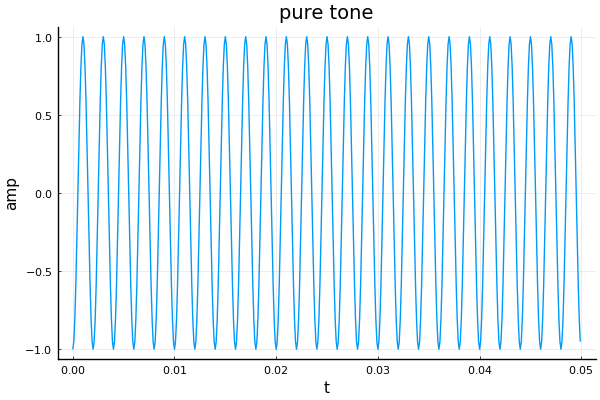

In [3]:
#frequency
f = 500

#pure tone settings
samp_freq = 10000
amp = 1.0
φ = π
total_secs = 5
ts, data = create_pure_tone(samp_freq, amp, f, φ, total_secs)

#save
file_name = "pure_tone.wav"
save_WAV_file(file_name, dir_name, data, samp_freq)

#loada
data, fs = read_WAV_file(file_name, dir_name)
#wavplay(data, fs)

#fig = plot(ts[1:500], data[1:500], label=false, xlabel="t", ylabel="amp", title="pure tone")

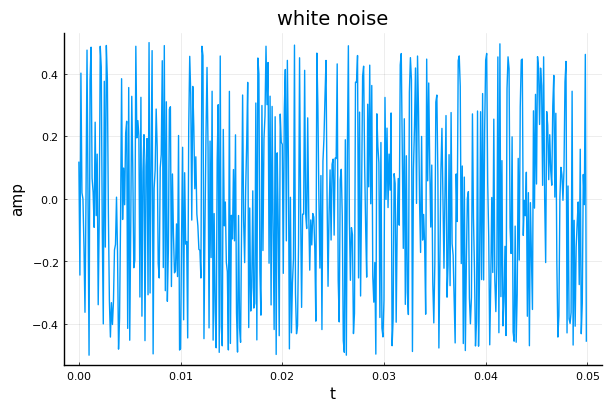

"/Users/kitanotomoya/Documents/julia/ML/ブログ/Missing-Fundamental/fig1.png"

In [4]:
#frequency
f = 500

#pure tone settings
samp_freq = 10000
amp = 1.0
φ = π
total_secs = 5
ts, data = create_white_noise(samp_freq, amp, f, φ, total_secs)

#save
file_name = "white noise.wav"
save_WAV_file(file_name, dir_name, data, samp_freq)

#loada
data, fs = read_WAV_file(file_name, dir_name)
#wavplay(data, fs)

fig = plot(ts[1:500], data[1:500], label=false, xlabel="t", ylabel="amp", title="white noise")
#savefig(fig, dir_name*"fig1.png")

## 2. Create complex tone

In [5]:
function create_complex_tone(samp_freq, fs, ratios, φ, total_secs)
    n_fs = length(fs)  #the number of pure tones
    Δt = 1 / samp_freq
    ts = 0:Δt:(total_secs-Δt)
    tones = zeros(total_secs * samp_freq, n_fs)
    for i in 1:n_fs
        tones[:, i] = cos.(2*π*fs[i]*ts .+ φ)
    end
    return ts, tones*ratios
end

create_complex_tone (generic function with 1 method)

In [6]:
#frequencies
fund_f = 200
all_fs = [200, 1000, 1200, 1400, 1600]
println("all frequencies: $(join(all_fs, ", "))")

#tone settings
samp_freq = 10000
amp = 1.0
ratios = ones(length(all_fs))
φ = π
total_secs = 5
ts, data = create_complex_tone(samp_freq, all_fs, ratios, φ, total_secs)

#save
file_name = "original_sound.wav"
save_WAV_file(file_name, dir_name, data, samp_freq)

#loada
#data, fs = read_WAV_file(file_name, dir_name)
#wavplay(data, fs)

plot(ts[1:500], data[1:500], label=false, xlabel="t", ylabel="amp")
#savefig(fig, dir_name*"fig2.png")

all frequencies: 200, 1000, 1200, 1400, 1600


"/Users/kitanotomoya/Documents/julia/ML/ブログ/Missing-Fundamental/fig2.png"

In [7]:
#frequencies
fund_f = 200
all_fs = [200, 1000, 1200, 1400, 1600]

#frequencies - fundamental
missing_fs = sort(all_fs)[2:end]
println("all frequencies: $(join(missing_fs, ", "))")

#tone settings
samp_freq = 10000
amp = 1.0
ratios = ones(length(missing_fs))
φ = π
total_secs = 5
ts, data = create_complex_tone(samp_freq, missing_fs, ratios, φ, total_secs)

#save
file_name = "missing_sound.wav"
save_WAV_file(file_name, dir_name, data, samp_freq)

#loada
data, fs = read_WAV_file(file_name, dir_name)
#wavplay(data, fs)

plot(ts[1:500], data[1:500], label=false, xlabel="t", ylabel="amp")
#savefig(fig, dir_name*"fig3.png")

all frequencies: 1000, 1200, 1400, 1600


"/Users/kitanotomoya/Documents/julia/ML/ブログ/Missing-Fundamental/fig3.png"